In [190]:
# import relevant libraries
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from IPython.display import Image
warnings.filterwarnings("ignore")

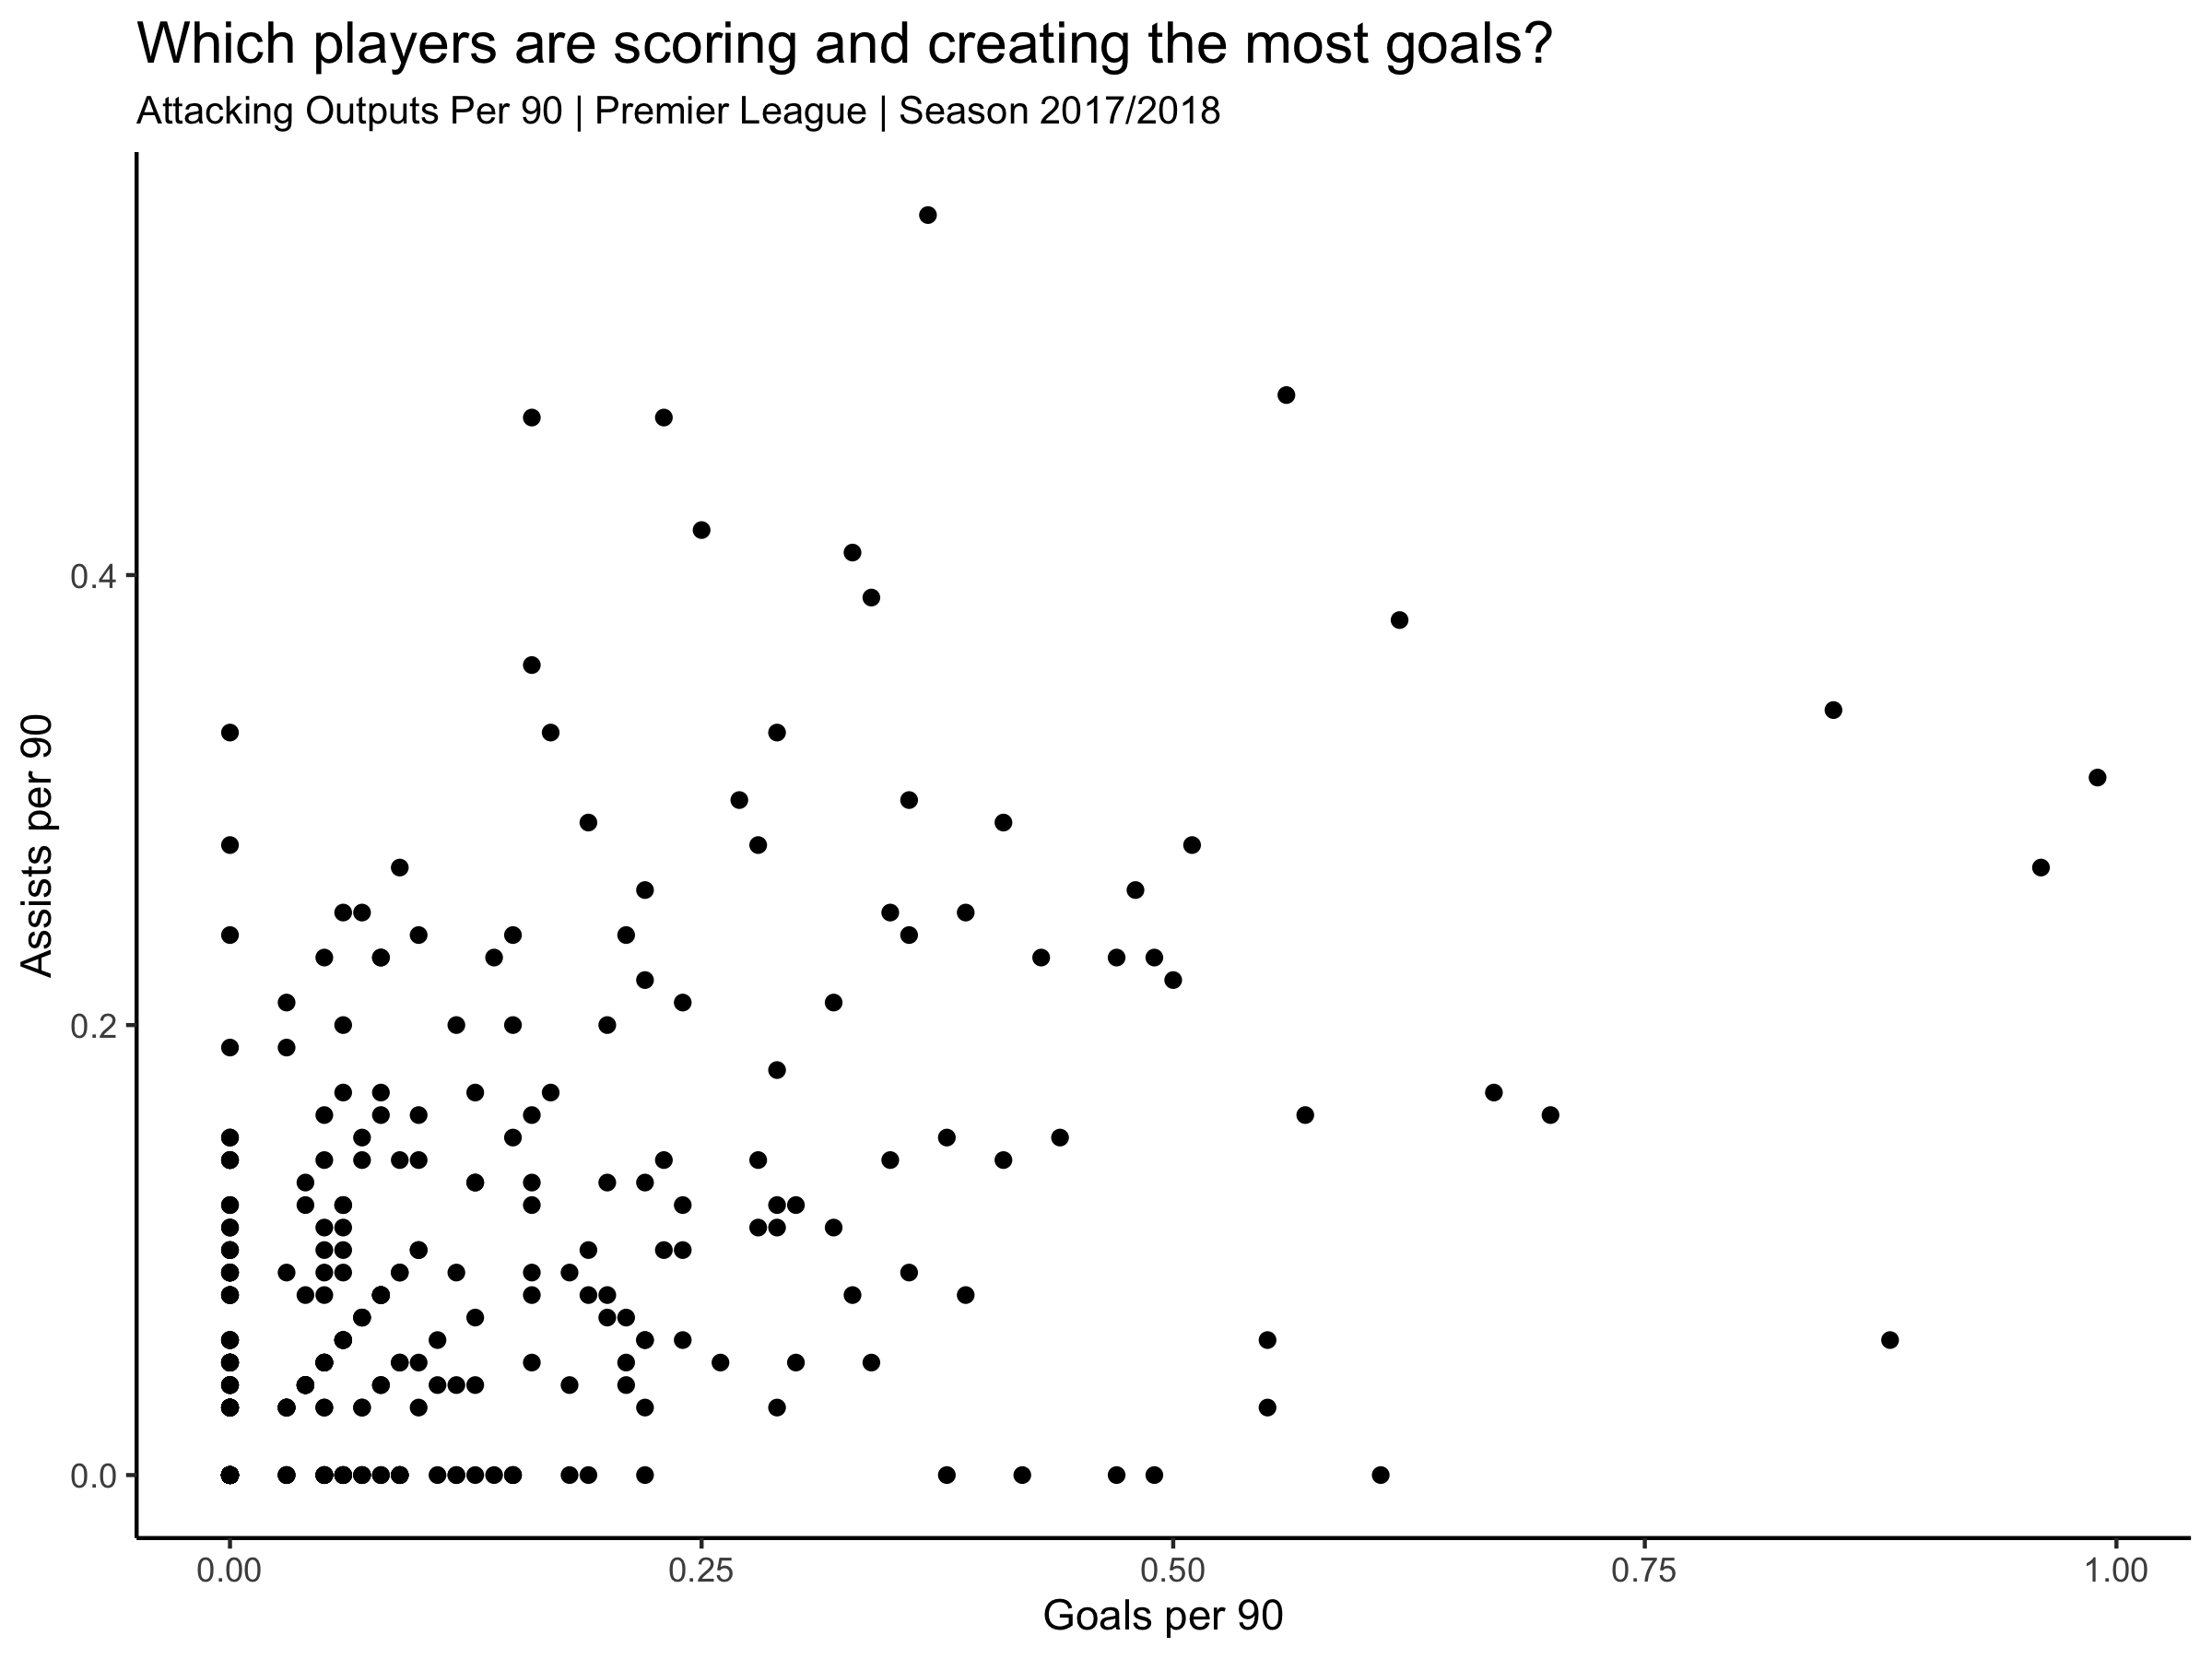

In [191]:
Image(filename='./plots/birkbeck-scatter-plot.png')

In [192]:
df = pd.read_csv('./data/pl_f9_sample.csv')
df

,player,player_id,team_name,team_id,mins_played,goals,total_shots,assists,chances_created,total_pass,accurate_pass,expected_goals
0,Aaron Cresswell,55459,West Ham United,21,3071,1,21,7,34,1299,1002,0.78
1,Aaron Lennon,17349,Burnley,90,1916,0,14,2,11,468,328,0.83
2,Aaron Mooy,74471,Huddersfield Town,38,3071,4,29,3,50,1902,1513,2.97
3,Aaron Ramsdale,225321,Bournemouth,91,0,0,0,0,0,0,0,0.00
4,Aaron Ramsey,41792,Arsenal,3,1846,7,56,8,28,1239,1052,6.14
...,...,...,...,...,...,...,...,...,...,...,...,...
597,Yohan Cabaye,27341,Crystal Palace,31,2386,0,38,1,42,1293,1065,2.35
598,Younes Kaboul,37742,Watford,57,151,0,0,0,0,76,52,0.00
599,Zanka,48760,Huddersfield Town,38,3420,0,13,2,9,1561,1198,1.92
600,Zlatan Ibrahimovic,9808,Manchester United,1,102,0,4,0,2,76,58,0.21


In [193]:
# create a new column in the data to get the goals per 90 minutes
df['nineties'] = df['mins_played'] / 90
df['goals_p90'] = df['goals'] / df['nineties']
df['assists_p90'] = df['assists'] / df['nineties']

In [194]:
# Filter for players who have played at least 1000 minutes
mask = (df.mins_played > 1000) 
df = df.loc[mask]
df.head(10)

,player,player_id,team_name,team_id,mins_played,goals,total_shots,assists,chances_created,total_pass,accurate_pass,expected_goals,nineties,goals_p90,assists_p90
0,Aaron Cresswell,55459,West Ham United,21,3071,1,21,7,34,1299,1002,0.78,34.122222,0.029306,0.205145
1,Aaron Lennon,17349,Burnley,90,1916,0,14,2,11,468,328,0.83,21.288889,0.000000,0.093946
2,Aaron Mooy,74471,Huddersfield Town,38,3071,4,29,3,50,1902,1513,2.97,34.122222,0.117226,0.087919
4,Aaron Ramsey,41792,Arsenal,3,1846,7,56,8,28,1239,1052,6.14,20.511111,0.341278,0.390033
7,Abdoulaye Doucouré,121599,Watford,57,3325,7,47,3,40,2244,1877,3.54,36.944444,0.189474,0.081203
10,Adam Smith,54469,Bournemouth,91,2069,1,13,3,22,912,751,0.53,22.988889,0.043499,0.130498
12,Adrian Mariappa,20145,Watford,57,2208,0,10,0,4,961,740,0.66,24.533333,0.000000,0.000000
14,Adrián,60706,West Ham United,21,1710,0,0,0,0,520,221,0.00,19.000000,0.000000,0.000000
15,Ahmed Hegazi,77777,West Bromwich Albion,35,3387,2,14,0,7,1186,867,1.65,37.633333,0.053144,0.000000
19,Alberto Moreno,100059,Liverpool,14,1264,0,12,0,15,783,660,0.50,14.044444,0.000000,0.000000


In [195]:
# create a new column in the data to get goal involement per 90 and sort by rows in order of this column
df['gi_p90'] = df['assists_p90'] + df['goals_p90']
df = df.sort_values('gi_p90', ascending = False)

In [196]:
top_5 = df.loc[df.gi_p90 > 0.50][0:5]
top_5

,player,player_id,team_name,team_id,mins_played,goals,total_shots,assists,chances_created,total_pass,accurate_pass,expected_goals,nineties,goals_p90,assists_p90,gi_p90
426,Mohamed Salah,118748,Liverpool,14,2921,32,144,10,62,946,726,24.34,32.455556,0.985964,0.308114,1.294077
527,Sergio Agüero,37572,Manchester City,43,1969,21,94,6,40,628,520,16.30,21.877778,0.959878,0.274251,1.234129
478,Pierre-Emerick Aubameyang,54694,Arsenal,3,1058,10,31,4,13,317,220,8.62,11.755556,0.850662,0.340265,1.190926
477,Philippe Coutinho,84583,Liverpool,14,1116,7,54,6,40,690,544,3.51,12.400000,0.564516,0.483871,1.048387
482,Raheem Sterling,103955,Manchester City,43,2592,18,87,11,55,1170,983,16.25,28.800000,0.625000,0.381944,1.006944


In [197]:
bottom_5 = df.loc[df.gi_p90 > 0.50][5:10]
bottom_5

,player,player_id,team_name,team_id,mins_played,goals,total_shots,assists,chances_created,total_pass,accurate_pass,expected_goals,nineties,goals_p90,assists_p90,gi_p90
220,Harry Kane,78830,Tottenham Hotspur,6,3083,30,184,2,33,657,468,24.79,34.255556,0.875770,0.058385,0.934155
361,Leroy Sané,182156,Manchester City,43,2422,10,57,15,58,1091,919,5.76,26.911111,0.371594,0.557391,0.928984
200,Gabriel Jesus,205651,Manchester City,43,1671,13,56,3,19,591,471,14.18,18.566667,0.700180,0.161580,0.861759
458,Oumar Niasse,113688,Everton,11,1081,8,37,2,11,250,156,7.05,12.011111,0.666050,0.166512,0.832562
48,Anthony Martial,148225,Manchester United,1,1581,9,49,5,33,731,599,6.38,17.566667,0.512334,0.284630,0.796964


In [245]:
# filter for players who have played at least 1000 minutes and scored or assisted at least once
mask_two = (df.mins_played > 1000) & (df.goals > 1) | (df.assists > 1)
df2 = df.loc[mask_two]

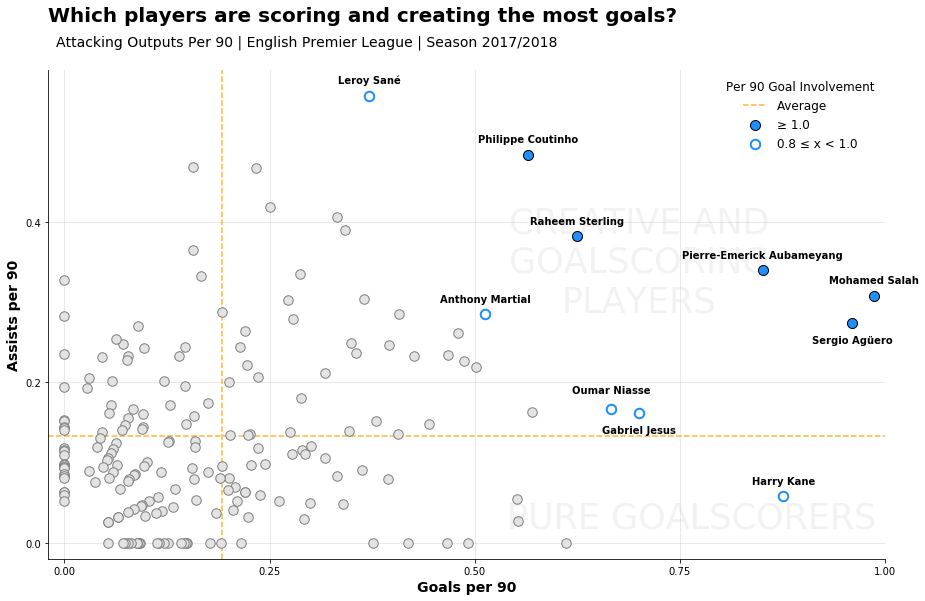

In [246]:
fig, ax = plt.subplots(figsize=(15,9))

# ax = plt.subplots((5,5), (0,0), colspan=4, rowspan=5)
# ax1 = plt.subplot2grid((5,5), (0,4))

#set and place ticks on main viz
xt = [0.00,0.25,0.50,0.75,1.00]
yt = [0,0.2,0.4,0.6]

ax.set_xticks(xt)
ax.set_yticks(yt)
ax.set_xlim(-0.02,1.00)
ax.set_ylim(-0.02,0.59)

# # Remove border from second viz
# ax1 = plt.subplot2grid((5,5), (0,4))
# ax1.axis("off")            #add this line

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#add gridlines to main viz
ax.grid(zorder=1,color="grey",alpha=0.2)

# # Add legend
# ax1.scatter(0,50,label="> 1.0", s=150,facecolor="dodgerblue",linewidth=1, edgecolors='black')
# ax1.scatter(0,47,label="0.8 ≤ 𝑥 < 1.0", s=150,facecolors='white', linewidth=2, edgecolors='dodgerblue')
# ax1.scatter(0,44,label="Average", s=150,facecolors='orange', marker='_')
# ax1.text(1,49.2,"> 1.0",fontsize=11)
# ax1.text(1,46.2,"0.8 ≤ x < 1.0",fontsize=11)
# ax1.text(1,43.2,"Average",fontsize=11)
# ax1.text(5.1,52.5,"Per 90 Goal Involvement",fontsize=12,ha="center")
# ax1.set_ylim(40,55)
# ax1.set_xlim(-1,10)

# Add plots
ax.scatter(df2['goals_p90'], df2['assists_p90'], s=90, facecolors='#E3E3E3', edgecolors='grey', zorder=2)
ax.scatter(top_5['goals_p90'], top_5['assists_p90'], s=100, facecolors='dodgerblue', linewidth=1, edgecolors='black', 
           zorder=3, label="≥ 1.0")
ax.scatter(bottom_5['goals_p90'], bottom_5['assists_p90'], s=90, facecolors='white', linewidth=2, 
           edgecolors='dodgerblue', zorder=3, label="0.8 ≤ x < 1.0")

# Plot the average line
ax.axvline(df2['goals_p90'].mean(), color='orange', linestyle='dashed', linewidth=1.5,zorder=1, alpha=0.8, label="Average")
ax.axhline(df2['assists_p90'].mean(), color='orange', linestyle='dashed', linewidth=1.5,zorder=1, alpha=0.8)
# ax.text(0.1, 0.99, 'Average Assists per 90',transform=ax.transAxes, color='black', fontsize=12,zorder=1)
# ax.text(0.8, 0.246, 'Average Goals per 90',transform=ax.transAxes, color='black', fontsize=12,zorder=1)

# Add background text
ax.text(0.99, 0.05, 'PURE GOALSCORERS', verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='grey', fontsize=35, alpha=0.1)
ax.text(0.70, 0.35, "CREATIVE AND\nGOALSCORING\nPLAYERS", verticalalignment='center', horizontalalignment='center',
        color='grey', fontsize=35, alpha=0.1)

# Label data points
dx, dy = top_5.goals_p90.values, top_5.assists_p90.values
for i in range(len(top_5)):
    if top_5.player.iloc[i] == "Mohamed Salah":
        ax.text(dx[i],dy[i]+0.015,top_5.player.iloc[i],ha="center",color="black",zorder=6,fontweight="bold")
    elif top_5.player.iloc[i] == "Sergio Agüero":
        ax.text(dx[i],dy[i]-0.025,top_5.player.iloc[i],ha="center",color="black",zorder=6,fontweight="bold")        
    elif top_5.player.iloc[i] == "Pierre-Emerick Aubameyang":
        ax.text(dx[i],dy[i]+0.015,top_5.player.iloc[i],ha="center",color="black",zorder=6,fontweight="bold")
    elif top_5.player.iloc[i] == "Raheem Sterling":
        ax.text(dx[i],dy[i]+0.015,top_5.player.iloc[i],ha="center",color="black",zorder=6,fontweight="bold")
    elif top_5.player.iloc[i] == "Philippe Coutinho":
        ax.text(dx[i],dy[i]+0.015,top_5.player.iloc[i],ha="center",color="black",zorder=6,fontweight="bold")
        
dx, dy = bottom_5.goals_p90.values, bottom_5.assists_p90.values
for i in range(len(bottom_5)):
    if bottom_5.player.iloc[i] == "Harry Kane":
        ax.text(dx[i],dy[i]+0.015,bottom_5.player.iloc[i],ha="center",color="black",zorder=6, fontweight="bold")
    elif bottom_5.player.iloc[i] == "Leroy Sané":
        ax.text(dx[i],dy[i]+0.015,bottom_5.player.iloc[i],ha="center",color="black",zorder=6,fontweight="bold")
    elif bottom_5.player.iloc[i] == "Gabriel Jesus":
        ax.text(dx[i],dy[i]-0.025,bottom_5.player.iloc[i],ha="center",color="black",zorder=6,fontweight="bold")
    elif bottom_5.player.iloc[i] == "Oumar Niasse":
        ax.text(dx[i],dy[i]+0.02,bottom_5.player.iloc[i],ha="center",color="black",zorder=6,fontweight="bold")
    elif bottom_5.player.iloc[i] == "Anthony Martial":
        ax.text(dx[i],dy[i]+0.015,bottom_5.player.iloc[i],ha="center",color="black",zorder=6,fontweight="bold")

ax.legend(title='Per 90 Goal Involvement', loc=0, frameon=False, title_fontsize=12,fontsize=12)
        
# Label axis/plot
ax.set_ylabel("Assists per 90",fontsize=14,fontweight="bold",color="black")
ax.set_xlabel("Goals per 90",fontsize=14,fontweight="bold",color="black")

ax.text(-0.02, 0.65, 'Which players are scoring and creating the most goals?', fontsize=20, fontweight='bold')
ax.text(-0.01, 0.62, 'Attacking Outputs Per 90 | English Premier League | Season 2017/2018', fontsize=14)
plt.savefig('birkbeck-lecture-2');